<a href="https://colab.research.google.com/github/SorrowAddict/SK-FLY-AI/blob/main/AI_Learning/Week-01_Python/231219_Pandas_seaborn_folium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas
## Pandas DataFrame
### 데이터 읽어오기
‣ titanic = pd.read_csv('./datasets/titanic.csv')\
‣ titanic = pd.read_excel(‘./datasets/titanic.xlsx’, sheet_name='Sheet1', engine='openpyxl')\
‣ 단 엑셀은 openpyxl 라이브러리를 설치 필수!!\
• print('type :', type(titanic))\
• print('shape : ', titanic.shape )

## 결측치 처리
###❖ 결측치 확인 및 처리
• 결측치\
‣ 데이터가 없는 경우\
‣ 데이터가 없다는 것을 다른 기호로 표시해 놓은 값\
• isna(), isnull()함수\
‣ 결측치인지 아닌지를 True, False로 표현\
• dropna()\
‣ 결측치가 포함된 행을 삭제\
• fillna()\
‣ 결측치를 특정 값으로 변경

In [1]:
import numpy as np
import pandas as pd
z = [['Jackson', 68, True, np.NaN, 'A'],
['Liam', 74, True, 1.1, 'A'],
['Emma', np.NaN, False, 0.89, 'C'],
['James', 78, np.NaN, 0.91, 'C'],
['Ava', 54, False, 0.73, 'C'],
['Henry', 69, True, np.NaN, 'C']]
df = pd.DataFrame(data= z, columns=['Name', 'Weight', 'Option', 'Rate', 'Type'])
df

,Name,Weight,Option,Rate,Type
0,Jackson,68.0,True,NaN,A
1,Liam,74.0,True,1.10,A
2,Emma,NaN,False,0.89,C
3,James,78.0,NaN,0.91,C
4,Ava,54.0,False,0.73,C
5,Henry,69.0,True,NaN,C


결측치 확인 : df.isna()\
• 결측치 개수 확인 :df.isna().sum()\
• 결측치 포함행 삭제 : df.dropna()\
• 결측치를 0으로 변경 : df.fillna(0)\
• 특정 컬럼의 결측치만 설정(‘Weight’ 컬럼의 결측치를 ‘Weight’ 컬럼의 평균으로 변경)

In [2]:
m = df['Weight'].mean()
print('mean :', m)
df['Weight'].fillna(m, inplace=True)
df

mean : 68.6


,Name,Weight,Option,Rate,Type
0,Jackson,68.0,True,NaN,A
1,Liam,74.0,True,1.10,A
2,Emma,68.6,False,0.89,C
3,James,78.0,NaN,0.91,C
4,Ava,54.0,False,0.73,C
5,Henry,69.0,True,NaN,C


In [3]:
re = df.dropna()
re

,Name,Weight,Option,Rate,Type
1,Liam,74.0,True,1.10,A
2,Emma,68.6,False,0.89,C
4,Ava,54.0,False,0.73,C


원본데이터 프레임 수정 : inplace=True\
re = df.dropna(inplace=True)\
df

In [4]:
df = pd.DataFrame({
'Weight':['68', '74','52','78','54','69'],
'Option':[True, True, False, True, False, True],
'Rate':[0.82, 1.1, 0.89, 0.91, 0.73, 0.78],
'Type':['A','B','C','C','B','C']
})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  6 non-null      object 
 1   Option  6 non-null      bool   
 2   Rate    6 non-null      float64
 3   Type    6 non-null      object 
dtypes: bool(1), float64(1), object(2)
memory usage: 278.0+ bytes


In [5]:
df['Weight'] = pd.to_numeric(df['Weight'])  #Weight 컬럼을 문자열에서 숫자로 변경
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  6 non-null      int64  
 1   Option  6 non-null      bool   
 2   Rate    6 non-null      float64
 3   Type    6 non-null      object 
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 278.0+ bytes


In [6]:
df['Weight'] = df['Weight'].astype(str)     #Weight 컬럼을 숫자에서 문자열로 변경
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  6 non-null      object 
 1   Option  6 non-null      bool   
 2   Rate    6 non-null      float64
 3   Type    6 non-null      object 
dtypes: bool(1), float64(1), object(2)
memory usage: 278.0+ bytes


# Crawling

In [7]:
!pip install bs4

In [9]:
import requests
# Requests 라이브러리를 활용한 HTML 페이지 요청
res = requests.get('http://v.media.daum.net/v/20170615203441266')
print(res.content)

b'<!doctype html>\n<html class="os_window"> \n <head data-cloud-area="head"> \n  <meta charset="utf-8"> \n  <meta http-equiv="X-UA-Compatible" content="IE=edge"> \n  <meta name="viewport" content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=no"> \n  <meta name="format-detection" content="telephone=no"> \n  <meta name="referrer" content="unsafe-url"> \n  <title>\xec\x9e\x94\xea\xb8\x88\xeb\x8c\x80\xec\xb6\x9c\xec\x97\x90\xeb\x8f\x84 DTI \xea\xb7\x9c\xec\xa0\x9c \xec\xa0\x81\xec\x9a\xa9 \xea\xb2\x80\xed\x86\xa0</title> \n  <link rel="shortcut icon" href="//t1.daumcdn.net/top/favicon.ico"> \n  <meta property="mccp:docId" content="nkhSoinQsa"> \n  <meta property="og:site_name" content="\xec\x96\xb8\xeb\xa1\xa0\xec\x82\xac \xeb\xb7\xb0"> \n  <meta property="og:title" content="\xec\x9e\x94\xea\xb8\x88\xeb\x8c\x80\xec\xb6\x9c\xec\x97\x90\xeb\x8f\x84 DTI \xea\xb7\x9c\xec\xa0\x9c \xec\xa0\x81\xec\x9a\xa9 \xea\xb2\x80\xed\x86\xa0"> \n  <meta property="og:regDate" content="20

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [11]:
import requests
from bs4 import BeautifulSoup as bs
res = requests.get('https://dhlottery.co.kr/common.do?method=main')
soup = bs(res.content, 'html.parser')
result = soup.select('.ball_645')
data = []
for num in result:
 data.append(int(num.text))
data

[10, 12, 13, 19, 33, 40, 2]

In [12]:
import pandas as pd
df = pd.Series(data)
df

0    10
1    12
2    13
3    19
4    33
5    40
6     2
dtype: int64

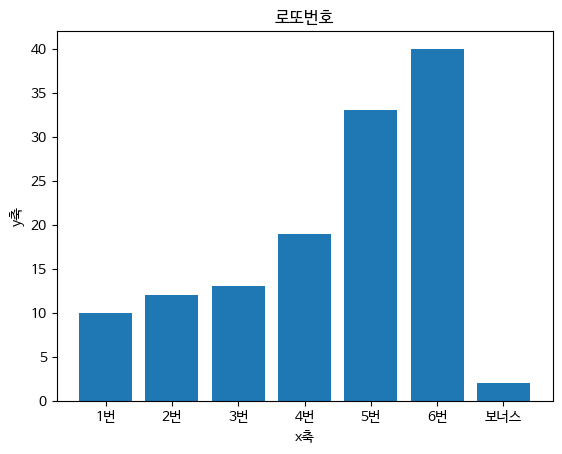

<Figure size 640x480 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.bar(['1번','2번','3번','4번','5번','6번','보너스'], data)
plt.title('로또번호')
plt.xlabel('x축')
plt.ylabel('y축')
plt.show()
plt.savefig('fig1.png')

In [14]:
import requests
from bs4 import BeautifulSoup as bs
res = requests.get('https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EC%84%9C%EC%9A%B8%EB%82%A0%EC%94%A8')
soup = bs(res.text, 'lxml')
print(soup.select_one('div._today > div > div.temperature_text > strong').text)

현재 온도8.5°


In [ ]:
import requests
from bs4 import BeautifulSoup as bs
res = requests.get('https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EC%84%9C%EC%9A%B8%EB%82%A0%EC%94%A8')
soup = bs(res.content, 'html.parser')
result = soup.select('.temperature_text')
data = []
for num in result:
 data.append(str(num.text))
data

[]
[]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


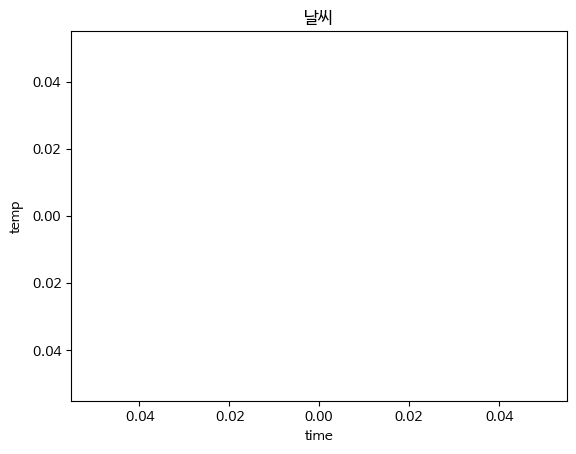

In [17]:
import requests
from bs4 import BeautifulSoup as bs
res = requests.get('https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EC%84%9C%EC%9A%B8%EB%82%A0%EC%94%A8')
soup = bs(res.content, 'html.parser')
result = soup.select('.degree_point .num')
result2 = soup.select('.graph_content .time')
data = []
data2 = []
for num in result:
 data.append(num.text)
for time in result2:
 data2.append(time.text)
print(data[:9])
print(data2[:9])

plt.rc('font', family='NanumBarunGothic')
plt.plot(data2[:9],data[:9], 'bo-', label='weather')
plt.title('날씨')
plt.xlabel('time')
plt.ylabel('temp')
plt.show()
# plt.savefig('fig1.png')

In [ ]:
!pip install newspaper3k

In [19]:
import newspaper as news
link = 'https://n.news.naver.com/article/001/0014393630'
article = news.Article(link, language='ko')
article.download()
article.parse()
print(article.text)

모두에게 보여주고 싶은 기사라면?beta 이 기사를 추천합니다 버튼을 눌러주세요.

집계 기간 동안 추천을 많이 받은 기사는 네이버 자동 기사배열 영역에 추천 요소로 활용됩니다. 레이어 닫기


In [ ]:
import requests
from bs4 import BeautifulSoup as bs
url = 'https://n.news.naver.com/article/001/0014393630'
res = requests.get(url, headers={'User-Agent':'Mozilla/5.0'})
res.content

In [ ]:
import os
import requests
from bs4 import BeautifulSoup
url = "https://n.news.naver.com/article/001/0014393630"
html = requests.get(url).text
soup = BeautifulSoup(html, 'html.parser')
if not(os.path.isdir("./webtoon")):
 os.makedirs(os.path.join("./webtoon"))
i = 1
for tag in soup.select('.newsct_article _article_body img'):
 img_url = tag['src']
 save_img = "./webtoon/" + str(i).zfill(3) + img_url[-4:]
 i += 1
 print(save_img + " : OK")
 headers = {'Referer': img_url}
 img_data = requests.get(img_url, headers=headers).content

with open(save_img, 'wb') as f:
 f.write(img_data)

In [22]:
import os
import requests
from bs4 import BeautifulSoup
url = "https://comic.naver.com/webtoon/detail.nhn?titleId=747961&no=2"
html = requests.get(url).text
soup = BeautifulSoup(html, 'html.parser')
if not(os.path.isdir("./webtoon")):
 os.makedirs(os.path.join("./webtoon"))
i = 1
for tag in soup.select('.wt_viewer img'):
 img_url = tag['src']
 save_img = "./webtoon/" + str(i).zfill(3) + img_url[-4:]
 i += 1
 print(save_img + " : OK")
 headers = {'Referer': img_url}
 img_data = requests.get(img_url, headers=headers).content

with open(save_img, 'wb') as f:
 f.write(img_data)

./webtoon/001.jpg : OK
./webtoon/002.jpg : OK
./webtoon/003.jpg : OK
./webtoon/004.jpg : OK
./webtoon/005.jpg : OK
./webtoon/006.jpg : OK
./webtoon/007.jpg : OK
./webtoon/008.jpg : OK
./webtoon/009.jpg : OK
./webtoon/010.jpg : OK
./webtoon/011.jpg : OK
./webtoon/012.jpg : OK
./webtoon/013.jpg : OK
./webtoon/014.jpg : OK
./webtoon/015.jpg : OK
./webtoon/016.jpg : OK
./webtoon/017.jpg : OK
./webtoon/018.jpg : OK
./webtoon/019.jpg : OK
./webtoon/020.jpg : OK
./webtoon/021.jpg : OK
./webtoon/022.jpg : OK
./webtoon/023.jpg : OK
./webtoon/024.jpg : OK
./webtoon/025.jpg : OK
./webtoon/026.jpg : OK
./webtoon/027.jpg : OK
./webtoon/028.jpg : OK
./webtoon/029.jpg : OK
./webtoon/030.jpg : OK
./webtoon/031.jpg : OK
./webtoon/032.jpg : OK
./webtoon/033.jpg : OK
./webtoon/034.jpg : OK
./webtoon/035.jpg : OK
./webtoon/036.jpg : OK
./webtoon/037.jpg : OK
./webtoon/038.jpg : OK
./webtoon/039.jpg : OK
./webtoon/040.jpg : OK
./webtoon/041.jpg : OK
./webtoon/042.jpg : OK
./webtoon/043.jpg : OK
./webtoon/0

파싱을 막아놓아서 크롤링이 안된 사례

In [23]:
import requests
from bs4 import BeautifulSoup as bs
res = requests.get('https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bkEw&pkid=68&os=25517275&qvt=0&query=%EC%98%81%ED%99%94%20%EC%84%9C%EC%9A%B8%EC%9D%98%20%EB%B4%84%20%ED%8F%89%EC%A0%90')
soup = bs(res.content, 'html.parser')
result = soup.select('.area_card_outer _item_wrapper .area_text_expand _ellipsis .desc _text')
data3 = []
for com in result:
 data3.append(com.text)
data3

[]

파싱을 막아놓아서 크롤링이 안된 사례

In [24]:
import requests
from bs4 import BeautifulSoup as bs
res = requests.get('https://www.lottecinema.co.kr/NLCHS/Movie/MovieDetailView?movie=20443')
soup = bs(res.content, 'html.parser')
result = soup.select('.review_info')
data3 = []
for com in result:
 data3.append(com)
data3

[]

제대로 크롤링이 된 사례

In [25]:
import requests
from bs4 import BeautifulSoup as bs
res = requests.get('http://www.cine21.com/movie/info/?movie_id=58978')
soup = bs(res.content, 'html.parser')
result = soup.select('.comment')
data3 = []
for info in result:
 data3.append(info.text)
data3

['권력이 영원할 줄 아는 사악한 바보들에게',
 '검사의 봄에 되돌아보는, 뱀의 욕망이 낳은 탄식과 울분의 밤',
 '여러모로 아슬아슬하다',
 '‘어떻게 성공했지?’라는 궁금증과 하나회를 향한 분노가 왔다 갔다',
 '‘전두광 영화’가 되지 않았다는 점이 놀랍다',
 '바둑을 오셀로로 뒤집으려는 병법의 하룻밤']

# Seaborn

In [26]:
import seaborn as sns
print(sns.__version__)

0.13.1


### data
.head()와 .info()를 보는 것은 매우 좋은 습관

In [27]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
print(titanic.head())
print('\n')
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-

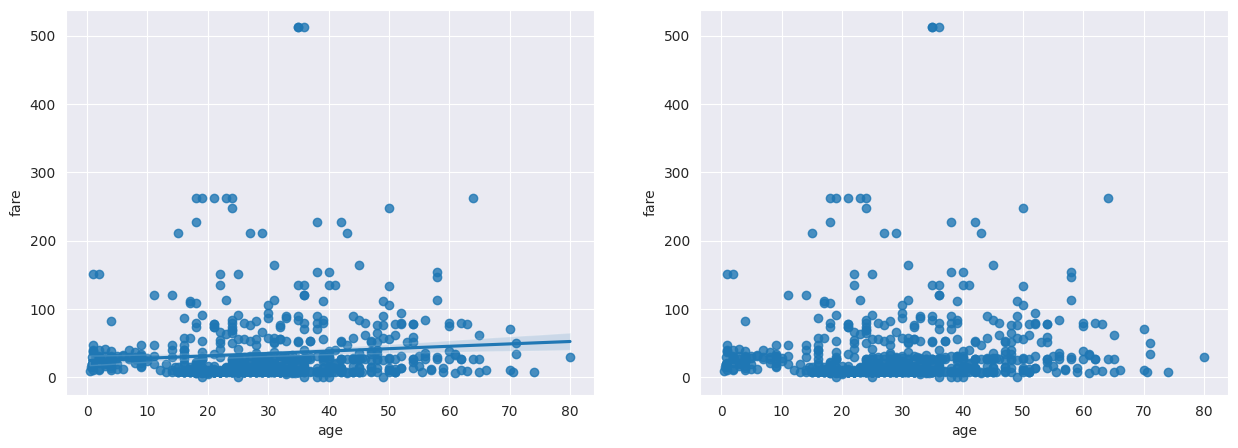

In [28]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.regplot(x='age', #x축 변수
    y='fare', #y축 변수
    data=titanic, #데이터
    ax=ax1) #axe 객체 - 1번째 그래프

sns.regplot(x='age', #x축 변수
    y='fare', #y축 변수
    data=titanic, #데이터
    ax=ax2, #axe 객체 - 2번째 그래프
    fit_reg=False) #회귀선 미표시
plt.show()

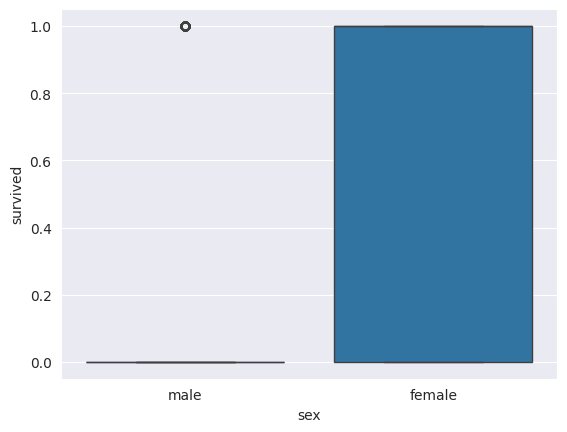

In [29]:
sns.boxplot(x='sex', y='survived', data=titanic)
plt.show()

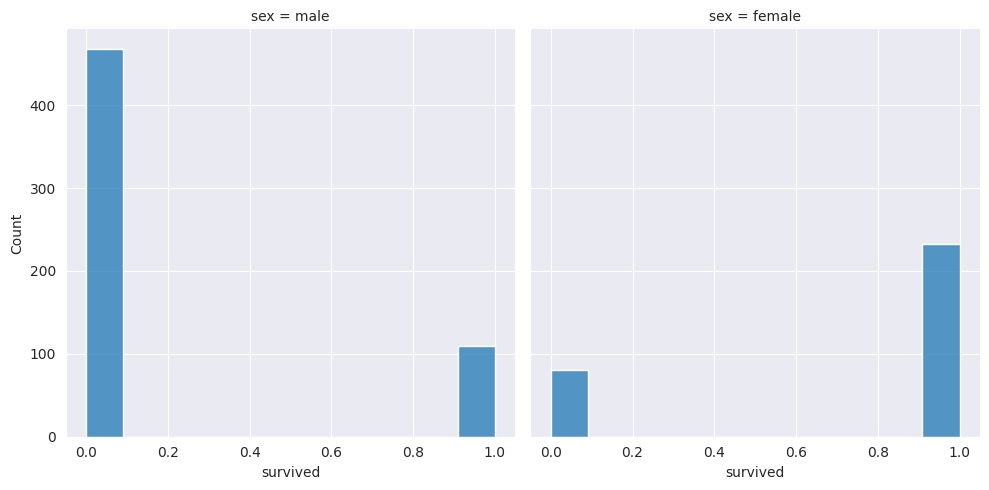

In [30]:
sns.displot(data=titanic, x='survived', col='sex')
plt.show()

In [ ]:
g = sns.FacetGrid(titanic, col="time", row="sex")
g.map_dataframe(sns.histplot, x="survived")
plt.show()

In [33]:
import folium
seoul_map = folium.Map(location=[37.55,126.98], zoom_start=12)
#seoul_map.save('./seoul.html’)
seoul_map

In [34]:
import folium
school_map = folium.Map(location=[37.36982, 127.9320], zoom_start=12)
#seoul_map.save('./seoul.html’)
school_map

In [35]:
seoul_map2 = folium.Map(location=[37.55,126.98], tiles='https://tiles.stadiamaps.com/tiles/stamen_terrain/{z}/{x}/{y}{r}.{ext}',
                        attr='&copy; <a href="https://www.stadiamaps.com/" target="_blank">Stadia Maps</a> &copy; <a href="https://www.stamen.com/" target="_blank">Stamen Design</a> &copy; <a href="https://openmaptiles.org/" target="_blank">OpenMapTiles</a> &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
                        zoom_start=15)
seoul_map2

In [36]:
seoul_map3 = folium.Map(location=[37.55,126.98], tiles='Stamen Toner', zoom_start=15)
seoul_map3

In [38]:
import pandas as pd
import folium
df = pd.read_excel('seoulUniv.xlsx', engine= 'openpyxl')
print(df)

               학교명         위도          경도
0     KAIST 서울캠퍼스   37.592573  127.046737
1            KC대학교  37.548345  126.854797
2     가톨릭대학교(성신교정)  37.585922  127.004328
3     가톨릭대학교(성의교정)  37.499623  127.006065
4         감리교신학대학교  37.567645  126.961610
5            건국대학교  37.540762  127.079343
6     경기대학교 서울캠퍼스   37.300485  127.035833
7     경희대학교 서울캠퍼스   37.596195  127.052544
8            고려대학교  33.847782 -117.977748
9            광운대학교  37.619496  127.059696
10           국민대학교  37.609641  126.997697
11         덕성여자대학교  37.651199  127.016160
12           동국대학교  37.557477  127.002052
13         동덕여자대학교  37.606320  127.041808
14    명지대학교 서울캠퍼스   37.580205  126.923445
15           삼육대학교  37.642952  127.105476
16    상명대학교 서울캠퍼스   37.602638  126.955252
17           서강대학교  37.550944  126.941002
18           서경대학교  37.615095  127.013111
19       서울과학기술대학교  37.631668  127.077481
20         서울교육대학교  37.489961  127.016412
21         서울기독대학교  37.600923  126.912382
22           서울대학교  37.459882  126

In [39]:
# 서울 지도 만들기
seoul_map = folium.Map(location=[37.55,126.98], zoom_start=12)
folium.TileLayer('stamenterrain').add_to(seoul_map)
# 대학교 위치정보를 Marker로 표시
for name, lat, lng in zip(df.index, df.위도, df.경도):
    folium.Marker([lat, lng], popup=name).add_to(seoul_map)
seoul_map

# 스타벅스 매장 folium 시각화 과제
API request,post를 이용해서 json 데이터를 가져온 후 folium 시각화

In [44]:
import requests
from bs4 import BeautifulSoup as bs

request = requests.post(url, data={
    'ins_lat'   : 37.5108295,           # 위도
    'ins_lng'   : 127.02928809999999,   # 경도
    'p_sido_cd' : '01',                 # 시,도 분류 코드
    'p_gugun_cd': '',                   # 시,군,구 분류 코드
    'in_biz_cd' : '' ,                  # 알 수 없는 정보(불필요)
    'iend'      : 2000,                 # 불러올 최대 매장 수
    'set_date'  : ''                    # 알 수 없는 정보(불필요)
})
url = 'https://www.starbucks.co.kr/store/store_map.do?disp=locale'
res = requests.get(url)#, farams=request)
soup = bs(res.content, 'html.parser')
result = soup.select('#mCSB_3_container li.quickResultLstCon')
print(result)
starbucks_data = []
for li in result:
    ins_lat = li['data-lat']
    ins_lng = li['data-lng'].strip()
    starbucks_data.append([ins_lat,ins_lng])        #,p_sido_cd,p_gugun_cd,in_biz_cd,iend,set_date
starbucks_data

[]


[]

In [41]:
import warnings
import requests
import folium
from pandas.io.json import json_normalize

# 스타벅스 사이트에서 위치정보를 수집
targetSite = 'https://www.starbucks.co.kr/store/getStore.do?r=5XLKAT2F0K'
request = requests.post(targetSite, data={
    'ins_lat'   : 37.5108295,           # 위도
    'ins_lng'   : 127.02928809999999,   # 경도
    'p_sido_cd' : '01',                 # 시,도 분류 코드
    'p_gugun_cd': '',                   # 시,군,구 분류 코드
    'in_biz_cd' : '' ,                  # 알 수 없는 정보(불필요)
    'iend'      : 2000,                 # 불러올 최대 매장 수
    'set_date'  : ''                    # 알 수 없는 정보(불필요)
})

star_json = request.json()
star_df = json_normalize(star_json, 'list')

<ipython-input-41-92af0c70cb4c>:19: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  star_df = json_normalize(star_json, 'list')


In [42]:
star_df_map = star_df[['s_name', 'sido_code', 'sido_name', 'gugun_code', 'gugun_name'
                       , 'doro_address', 'lat', 'lot']]

# astype() 메소드로 위도, 경도의 데이터 타입—>object에서 float.
star_df_map['lat'] = star_df_map['lat'].astype(float)
star_df_map['lot'] = star_df_map['lot'].astype(float)

<ipython-input-42-10028af16f16>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  star_df_map['lat'] = star_df_map['lat'].astype(float)
<ipython-input-42-10028af16f16>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  star_df_map['lot'] = star_df_map['lot'].astype(float)


In [43]:
star_map = folium.Map(
    location=[star_df_map['lat'].mean(),star_df_map['lot'].mean()],
    zoom_start=12)
for (index, data) in star_df_map.iterrows():
    string = '{}점 - {}'.format(data['s_name'], data['doro_address'])
    popup = folium.Popup(string, max_width=600)
    folium.Marker(
        location=[data['lat'], data['lot']],
        popup=popup
    ).add_to(star_map)
star_map